# Titanic Survival Classification

In [1]:
# Import required libraries
import pandas as pd  
import numpy as np   
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df = pd.read_csv('C:/Users/PMLS/OneDrive/Desktop/titanic/train.csv')

In [4]:
# Explore the data
print("First few rows:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Description:\n", df.describe())

First few rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

In [5]:
# Feature Selection
features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked']
target = 'Survived'

X = df[features]
y = df[target]

In [6]:
# Split into traing and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
# Preprocessing pipeline
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']
numeric_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())])

categorical_features = ['Sex', 'Pclass', 'Embarked']
categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [8]:
# Model pipeline
model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state = 42))])

In [9]:
# Train the model
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [10]:
# Make predicitions on validation set
y_pred = model.predict(X_val)

In [11]:
# Evaluate the model
print("Model Evaluation:")
print("Accuracy: ", accuracy_score(y_val, y_pred))
print("Precision: ", precision_score(y_val, y_pred))
print("Recall: ", recall_score(y_val, y_pred))
print("F1 Score: ", f1_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Model Evaluation:
Accuracy:  0.8100558659217877
Precision:  0.7777777777777778
Recall:  0.7567567567567568
F1 Score:  0.7671232876712328

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



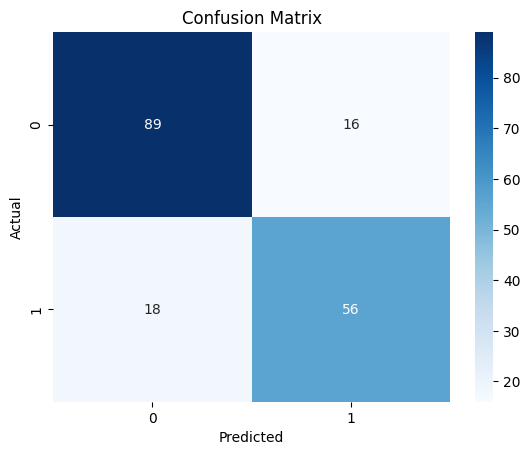

In [12]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

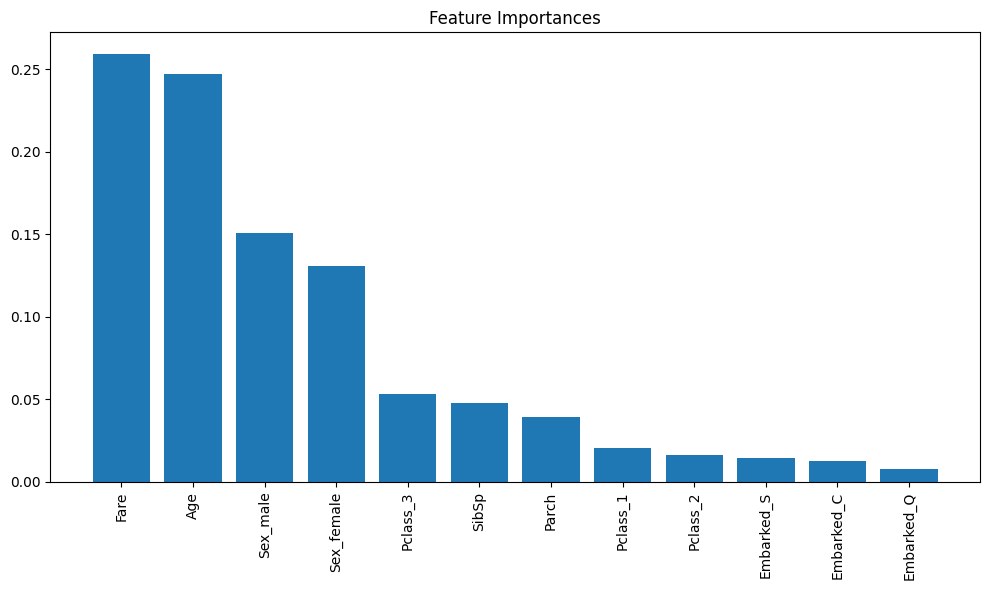

In [13]:
# Feature importance
if hasattr(model.named_steps['classifier'], 'feature_importances_'):
    ohe_columns = list(model.named_steps['preprocessor'].named_transformers_['cat']
                      .named_steps['onehot'].get_feature_names_out(categorical_features))
    feature_names = numeric_features + ohe_columns
    
    importances = model.named_steps['classifier'].feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

In [14]:
# Example prediction
example_passenger = pd.DataFrame({
    'Pclass': [1],
    'Sex': ['female'],
    'Age': [30],
    'Fare': [100],
    'SibSp': [0],
    'Parch': [0],
    'Embarked': ['S']
})

prediction = model.predict(example_passenger)
print("\nExample Prediction:", "Survived" if prediction[0] == 1 else "Did not survive")


Example Prediction: Survived
